# MINI PROJECT 1:

### About Dataset:

***university_enrollment.csv*** is the dataset for this project. The dataset provides a comprehensive overview of university enrollment. The university has started offering online courses to reach a wider range of students. The dataset consists of the following columns;

- **course_id:** Identifier for each course.

- **course_type:** Type or category of the course.

- **year:** The year the course was offered.

- **enrollment_count:** The number of students enrolled in the course.

- **pre_score:** Scores of students before taking the course.

- **post_score:** Scores of students after completing the course.

- **pre_requirement:** Any prerequisites or pre-requirements for the course.

- **department:** The department offering the course.

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the DataFrame:

In [2]:
uni_df = pd.read_csv("university_enrollment.csv")

##### How many rows and the columns in the DataFrame:

In [9]:
uni_df.shape

(1850, 8)

##### First five rows:

In [4]:
uni_df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


##### Last five rows:

In [5]:
uni_df.tail()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math
1849,1850,online,2017,256,17.57,72.0,None,Math


##### Summary Statistics:

In [15]:
uni_df.describe()

,course_id,year,enrollment_count,post_score
count,1850.000000,1850.000000,1850.000000,1665.000000
mean,925.500000,2016.423784,231.565405,75.204805
std,534.193317,3.448278,36.987029,8.511981
min,1.000000,2011.000000,154.000000,51.000000
25%,463.250000,2013.000000,185.000000,69.000000
50%,925.500000,2016.000000,251.000000,75.000000
75%,1387.750000,2019.000000,261.000000,81.000000
max,1850.000000,2022.000000,267.000000,105.000000


### Data Wrangling:

##### Checking number of columns:

In [6]:
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 86.8+ KB


##### Data Types:

In [12]:
print(uni_df.dtypes)

course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object


- **Note:** *pre_score*: column should also be in (float) data type.

##### Convert pre_score column from object to float:

In [3]:
# convert 'pre_score'
uni_df['pre_score'] = pd.to_numeric(uni_df['pre_score'], errors='coerce')

- The **pd.to_numeric** function attempts to convert each value in the pre_score column to a float.
- **The errors='coerce'** argument converts any invalid parsing (like non-numeric values) into NaN.

In [4]:
# check the data type of 'pre_score' after conversion
print("\nData type after conversion:", uni_df['pre_score'].dtype)

print("\nAfter conversion:")
uni_df.head()


Data type after conversion: float64

After conversion:


,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


##### Checking for missing values:

In [9]:
print("Missing values summary:")
print(uni_df.isna().sum())

Missing values summary:
course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score           130
post_score          185
pre_requirement      89
department            0
dtype: int64


In [5]:
# let's make a copy of a DataFrame so the original one won't affected

uni_df_copy = uni_df.copy()
uni_df_copy

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76.00,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


### Impute Missing Values:

##### For Numeric Columns:

In [6]:
# fill the missing values of 'pre_score' and 'post_score' with their mean

uni_df_copy['pre_score'] = uni_df_copy['pre_score'].fillna(uni_df_copy['pre_score'].mean())
uni_df_copy['post_score'] = uni_df_copy['post_score'].fillna(uni_df_copy['post_score'].mean())

# after imputing, check missing values
print("Missing values after imputed:")
print(uni_df_copy.isna().sum())

Missing values after imputed:
course_id            0
course_type          0
year                 0
enrollment_count     0
pre_score            0
post_score           0
pre_requirement     89
department           0
dtype: int64


##### For Categorical Column:

In [7]:
# fill missing 'pre_requirement' with the most frequent value (mode)
uni_df_copy['pre_requirement'] = uni_df_copy['pre_requirement'].fillna(uni_df_copy['pre_requirement'].mode()[0])

# after imputing, check missing values
print("Missing values after imputation:")
print(uni_df_copy.isna().sum())

Missing values after imputation:
course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64


**'df['pre_requirement'].mode()'** calculates the mode of the pre_requirement column then extracts the first mode from the resulting Series.

Here at this stage, the data is cleaned and it's the time to visualize, make insights about the dataset. Let's Begin!

## Data Analysis & Visualizing the Insights:

### Enrollment Trends:

##### Q: Calculate the average enrollment count for each course type (online vs. classroom).

In [9]:
# group by course_type and calculate the mean enrollment count
enroll_by_type = uni_df_copy.groupby('course_type')['enrollment_count'].mean()
print("On Average Enrollment Count By Course Type:\n",enroll_by_type)

On Average Enrollment Count By Course Type:
 course_type
classroom    170.429474
online       252.685091
Name: enrollment_count, dtype: float64


##### Visualize Enrollment by Course Type:

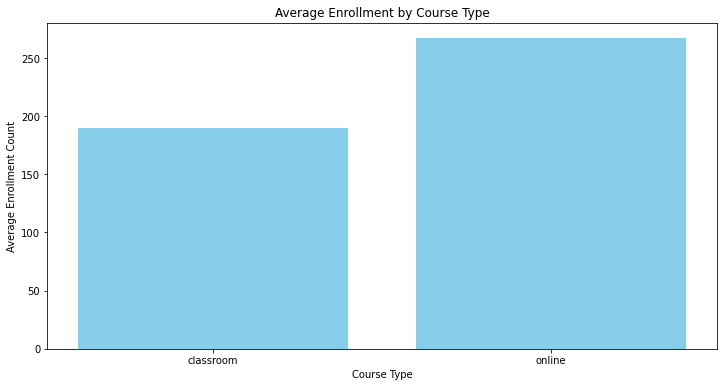

In [32]:
# compare online and classroom courses

plt.figure(figsize=(12, 6))
plt.bar(uni_df_copy['course_type'], uni_df_copy['enrollment_count'],
        color='skyblue')
plt.title('Average Enrollment by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Average Enrollment Count')
plt.show()

- This graph shows that the most university students had enrolled in Online Course Type.

##### Q: Analyze how enrollment varies by year and course type.

In [28]:
# group by year and course_type, calculating the sum of enrollment counts
enroll_trend = uni_df_copy.groupby(['year', 'course_type'])['enrollment_count'].sum().unstack()
enroll_trend

course_type,classroom,online
year,,
2011,6653,27456
2012,6089,32374
2013,7662,31235
2014,8591,25753
2015,7154,29756
2016,7188,30319
2017,5637,27913
2018,6263,30214
2019,7083,26402


##### Plotting the Enrollment trend for each course type:

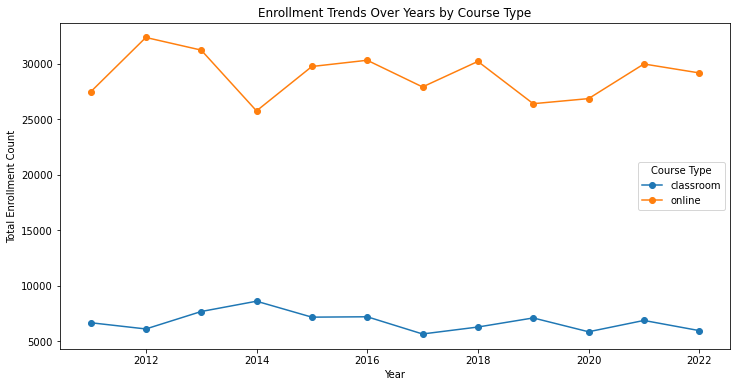

In [30]:
plt.figure(figsize=(12, 6))
for course_type in enroll_trend.columns:
    plt.plot(enroll_trend[course_type], label = course_type, marker = 'o')
plt.title('Enrollment Trends Over Years by Course Type')
plt.xlabel('Year')
plt.ylabel('Total Enrollment Count')
plt.legend(title='Course Type')
plt.show()

**Highest Count:**
- In 2012, highest enrollment count for Online type.
- In 2014, highest enrollment count for Classroom type.

**Lowest Count:**
- 2014 was the lowest enrollment count for Online type.
- 2017 was the lowest enrollment count for Classroom type.

### Course Performance:

##### Q: Average Pre and Post Score for Each Course.

In [35]:
# calculate the averages
avg_scores = uni_df_copy.groupby('course_id')[['pre_score', 'post_score']].mean()

print("Average Pre and Post Scores for Each Course:\n")
avg_scores

Average Pre and Post Scores for Each Course:



,pre_score,post_score
course_id,,
1,28.14,73.0
2,79.68,86.0
3,57.24,80.0
4,97.67,75.0
5,39.75,76.0
...,...,...
1846,60.01,81.0
1847,94.27,85.0
1848,76.00,81.0


##### Visualizing:

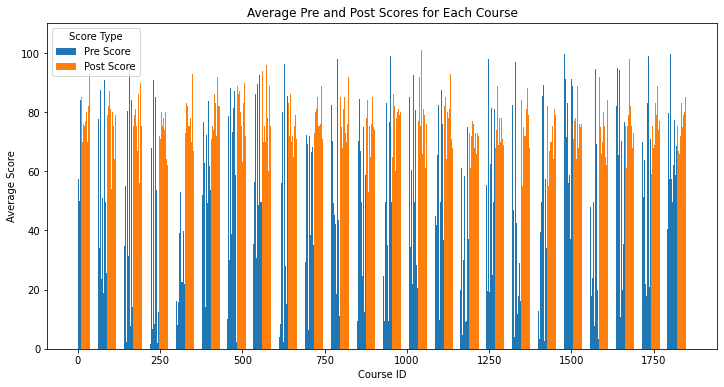

In [43]:
bar_width = 0.35
index = range(len(avg_scores))

plt.figure(figsize=(12, 6))
plt.bar(index, avg_scores['pre_score'], width = bar_width, label = 'Pre Score')
plt.bar([i + bar_width for i in index], avg_scores['post_score'], width = bar_width, label = 'Post Score')
plt.title('Average Pre and Post Scores for Each Course')
plt.xlabel('Course ID')
plt.ylabel('Average Score')
plt.legend(title='Score Type')
plt.show()

##### Q: Courses Leading to Higher Improvements.

To determine which courses lead to higher improvements (difference between post_score and pre_score), calculate the difference and then find the average improvement for each course.

In [9]:
# calculate the imp. for each course
uni_df_copy['score_imp'] = uni_df_copy['post_score'] - uni_df_copy['pre_score']

# finding the avg. improvement for each course
avg_imp = uni_df_copy.groupby('course_id')['score_imp'].mean()

print("Average Score Improvement for Each Course:\n", avg_imp)

Average Score Improvement for Each Course:
 course_id
1       44.86
2        6.32
3       22.76
4      -22.67
5       36.25
        ...  
1846    20.99
1847    -9.27
1848     5.00
1849    45.33
1850    54.43
Name: score_imp, Length: 1850, dtype: float64


##### Visualize a courses which leading to higher improvement.

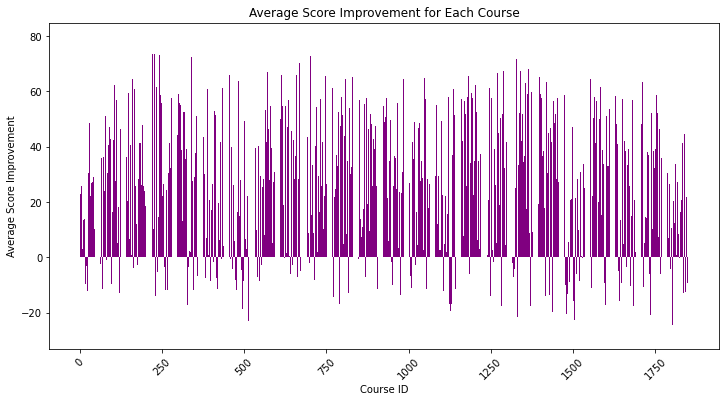

In [11]:
# plot avg. score improvement for each course

plt.figure(figsize=(12, 6))
plt.bar(avg_imp.index, avg_imp, color='purple')
plt.title('Average Score Improvement for Each Course')
plt.xlabel('Course ID')
plt.ylabel('Average Score Improvement')
plt.xticks(rotation=45)
plt.show()

### Departmental Insights:

##### Q: Most Popular Courses (Highest Enrollments) by Department.

To find which departments offer the most popular courses, sum the **'enrollment_count'** for each department.

In [14]:
# calculate total enrollment for each department
total_enroll_by_depart = uni_df_copy.groupby('department')['enrollment_count'].sum().sort_values(ascending=False)

print("Total Enrollment by Department:\n", total_enroll_by_depart)

Total Enrollment by Department:
 department
Technology     178598
Science        100572
Math            51865
Mathematics     51296
Engineering     46065
Name: enrollment_count, dtype: int64


##### Visualizing Most Popular Courses By Department.

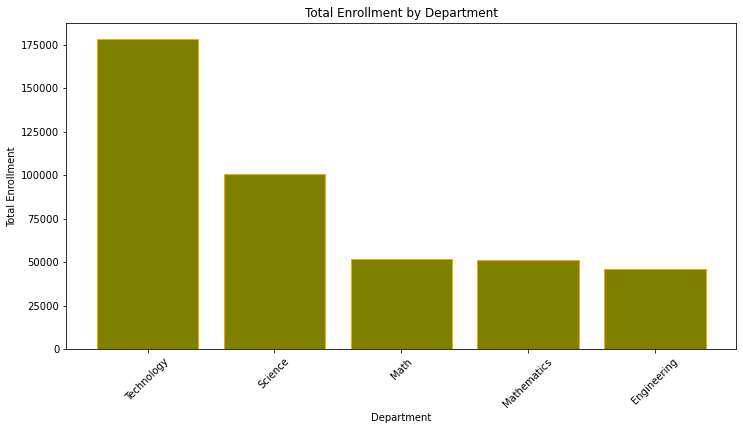

In [25]:
# plot total enrollment by department

plt.figure(figsize=(12, 6))
plt.bar(total_enroll_by_depart.index, total_enroll_by_depart, color='olive', edgecolor='orange')
plt.title('Total Enrollment by Department')
plt.xlabel('Department')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45)
plt.show()

- This graph shows that the highest number of enrollments was in the **Technology Department**.

##### Q: Departments with Consistently Higher Performance Improvement.

In [22]:
# calculate the avg. score improvement for each department
avg_imp_by_depart = uni_df_copy.groupby('department')['score_imp'].mean().sort_values(ascending=False)

print("Average Score Improvement by Department:\n", avg_imp_by_depart)

Average Score Improvement by Department:
 department
Mathematics    28.158306
Science        25.818679
Technology     25.604807
Math           24.671960
Engineering    24.129753
Name: score_imp, dtype: float64


##### Visualizing the Departments with higher performance improvements:

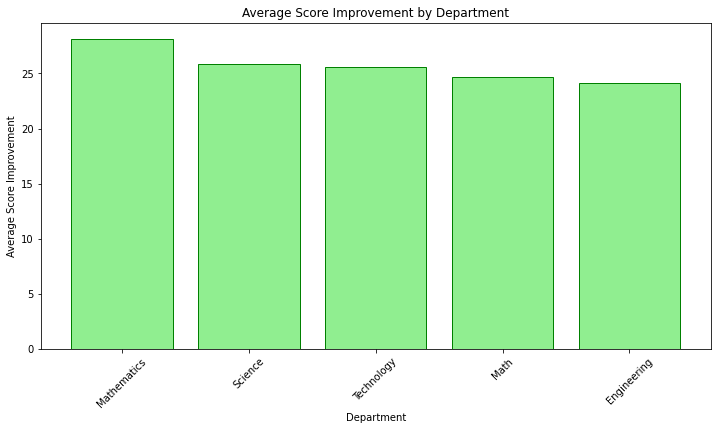

In [26]:
# plot average score improvement by department

plt.figure(figsize=(12, 6))
plt.bar(avg_imp_by_depart.index, avg_imp_by_depart, color='lightgreen', edgecolor='green')
plt.title('Average Score Improvement by Department')
plt.xlabel('Department')
plt.ylabel('Average Score Improvement')
plt.xticks(rotation=45)
plt.show()